# **Retail Stores Sales**




# **Project Summary :**

**Steps involved:**

> Step 1: Data Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

**Libraries used**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Scipy


**Graphs used for representation:**
1. Bar plot
2. Pie plot
3. Box Plot
4. Grouped bar plot
5. Donut plot
6. Heatmap
7. Pair plot

**Insights from EDA impacting business:**

* The most selling and crowded store type is A.
* More stores are opened during School holidays than State holidays.
* Mondays have most sales since most of the Sundays are closed.
* Promo 1 has given positive yields where as Promo 2 is a disaster.
* Store type b has higher sales and customers per store than other store types.
* Assortment b is available only at store type b and it has more sales and customers than any other assortment.

**Suggestions provided to increase the Sales:**

* There are very few B type stores, few more can be opened as average sales are quite high as compared to other types.
* Assortment B is only available with store type B which can be extended to other types as well to cater the demands of customers.
* Promo 2 should be discontinued and Promo 1 can be extended futher as it shows better results.
* Very few stores are opened during State Holidays, so it suggested to open a subsequent amount of stores to serve in emergency purposes.

## ***1. Data***

### Importing Libraries

In [ ]:
# Import Libraries
# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from numpy import math

#For handling date column
from datetime import datetime
#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import plotly.express as x

#For statistical calculation
import scipy.stats as stats

#For missing values
import missingno as msno

#For hypothesis testing
from statsmodels.stats.weightstats import ztest
from scipy.stats import pearsonr

%matplotlib inline

#For printing all the columns in pandas
pd.set_option('display.max_columns', None)

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Loading Dataset
dataset_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail-Sales/data/Rossmann Stores Data.csv')
dataset_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail-Sales/data/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset_1.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
dataset_2.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [ ]:
dataset_2.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

### Dataset Rows & Columns count

In [ ]:
# Checking Rows and Columns
dataset_1.shape

(1017209, 9)

In [ ]:
dataset_2.shape

(1115, 10)

###Merging Both Datasets

In [ ]:
# Mearging on the basis of Store
merged_dataset=pd.merge(dataset_1, dataset_2, on='Store', how='inner')

In [ ]:
# Create a Copy for anaysis
df = merged_dataset.copy()

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# mearged data set first view
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

### Dataset Information

In [ ]:
# Dataset Rows & Columns count
df.shape

(1017209, 18)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

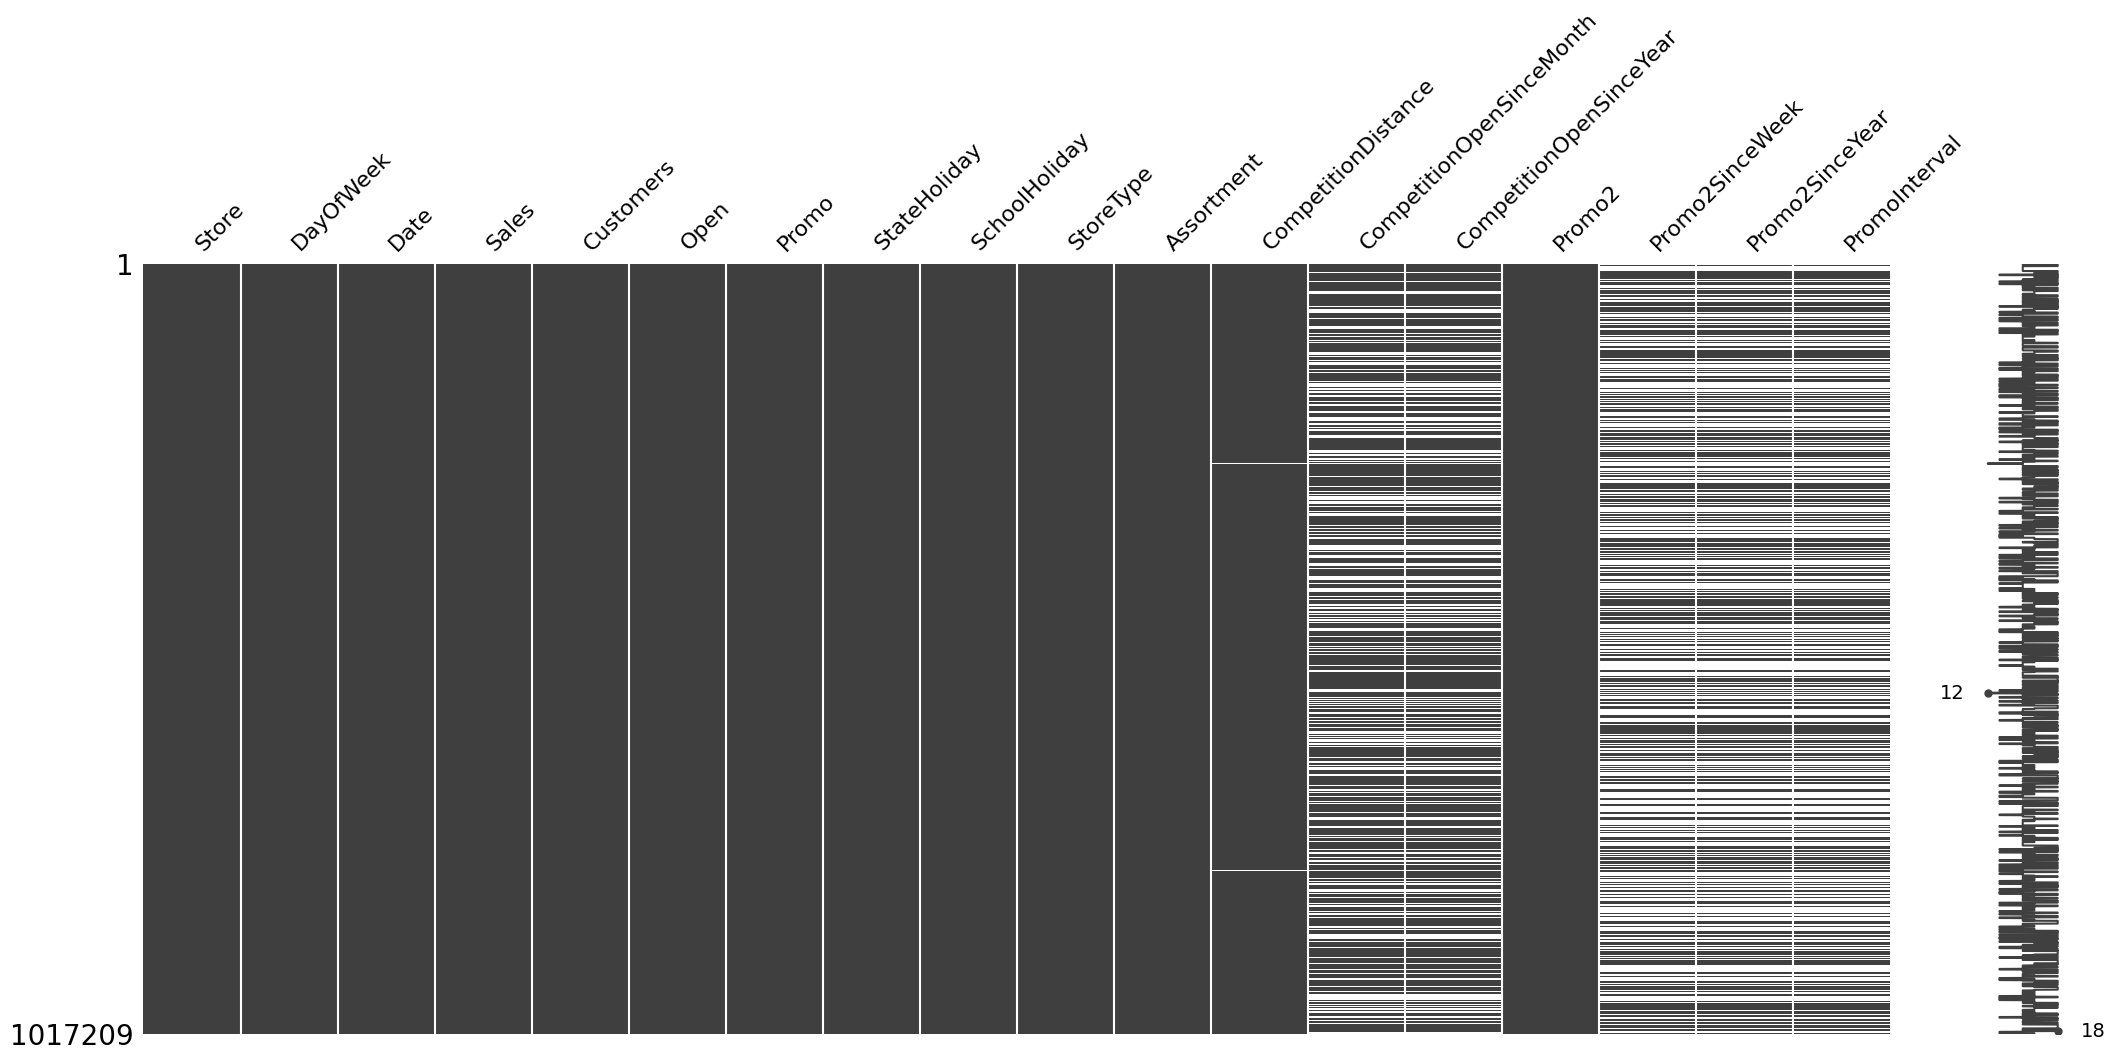

In [ ]:
# Visualizing the missing values
msno.matrix(df)

### Treating null/NaN Values

In [ ]:
# Replacing Nan values with median in CompetitionDistance
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# Replacing Nan values with median in CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].median())

# Replacing Nan values with median in CompetitionOpenSinceYear
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median())

# Replacing Nan values with 0 in Promo2SinceWeek
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceYear
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

# Replacing Nan values with 0 in PromoInterval
df['PromoInterval'] = df['PromoInterval'].fillna(0)

In [ ]:
df_ts=df.copy()

In [ ]:
# Now checking Nan values
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<Axes: >

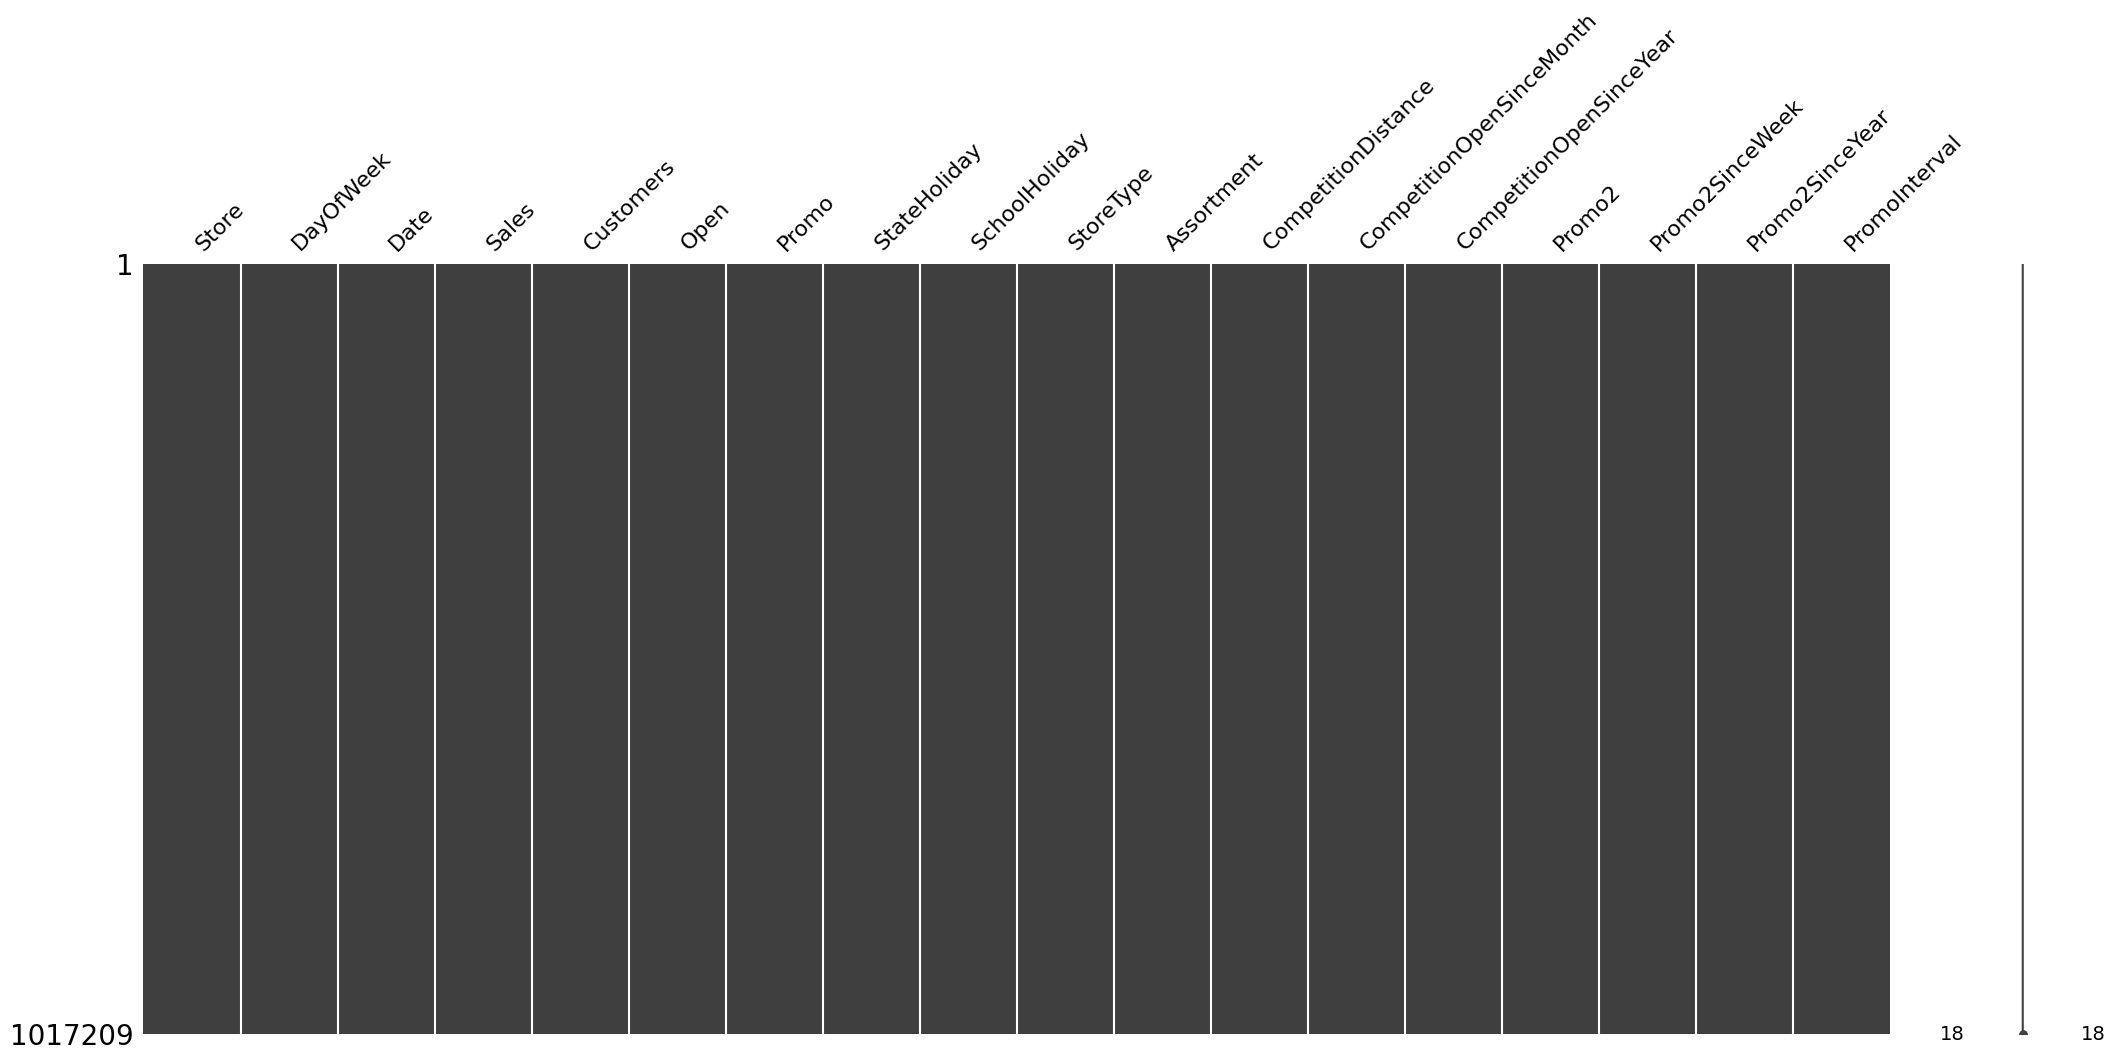

In [ ]:
# Visualzing Null Values after treatment
msno.matrix(df)

### What did you know about your dataset?

####1) Dataset_1 has 1017209 rows & 9 columns and Dataset_2 has 1115 rows & 10 columns after combining both, merged data set contains 1017209 rows & 18 columns.
####2) NaN values in variables 'CompetitionDistance',  'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear' are replaced by median since there is high possibilty of having competition stores & NaN values in variables  'Promo2SinceWeek', 'Promo2SinceYear',  'PromoInterval' are replaced by 0 since those stores have not applied Promo2 yet.
####3) Dataset has no Duplicate values.
####4) Variables named 'Open', 'Promo', 'SchoolHoliday', 'Promo2' has boolean values.
####5) Dataset has timeline from 01/01/2013 to 31/07/2015.

## ***2. Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday StoreType  \
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06   1017209   
unique           NaN           NaN            5            NaN         4   
top              NaN           NaN            0            NaN         a   
freq             NaN           NaN       855087            NaN    551627   
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01       NaN   
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01       NaN   
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00       NaN   
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00       NaN   
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00       NaN   
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00       NaN   
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00       NaN   

       Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
count     1017209         1.017209e+06               1.017209e+06   
unique          3                  NaN                        NaN   
top             a                  NaN                        NaN   
freq       537445                  NaN                        NaN   
mean          NaN         5.422034e+03               7.469899e+00   
std           NaN         7.706913e+03               2.677243e+00   
min           NaN         2.000000e+01               1.000000e+00   
25%           NaN         7.100000e+02               6.000000e+00   
50%           NaN         2.330000e+03               8.000000e+00   
75%           NaN         6.880000e+03               9.000000e+00   
max           NaN         7.586000e+04               1.200000e+01   

        CompetitionOpenSinceYear        Promo2  Promo2SinceWeek  \
count               1.017209e+06  1.017209e+06     1.017209e+06   
unique                       NaN           NaN              NaN   
top                          NaN           NaN              NaN   
freq                         NaN           NaN              NaN   
mean                2.009107e+03  5.005638e-01     1.164767e+01   
std                 4.986802e+00  4.999999e-01     1.532393e+01   
min                 1.900000e+03  0.000000e+00     0.000000e+00   
25%                 2.008000e+03  0.000000e+00     0.000000e+00   
50%                 2.010000e+03  1.000000e+00     1.000000e+00   
75%                 2.011000e+03  1.000000e+00     2.200000e+01   
max                 2.015000e+03  1.000000e+00     5.000000e+01   

        Promo2SinceYear  PromoInterval  
count      1.017209e+06      1017209.0  
unique              NaN            4.0  
top                 NaN            0.0  
freq                NaN       508031.0  
mean       1.007011e+03            NaN  
std        1.005877e+03            NaN  
min        0.000000e+00            NaN  
25%        0.000000e+00            NaN  
50%        2.009000e+03            NaN  
75%        2.012000e+03            NaN  
max        2.015000e+03            NaN

### Variables Description


* #### Store - Unique Id for each store
* #### DayOfWeek - Days in a week (1-7)
* #### Date - Timeline of dataset (From 2013-01-01 to 2015-07-31)
* #### Sales - Turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### Promo - indicates whether a store is running a promo on that day
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f"Unique {i}'s count:{df[i].nunique()}")
  if i in df.columns:
    if(df[i].nunique() < 25):
      print(f"{df[i].unique()}\n")

Unique Store's count:1115
Unique DayOfWeek's count:7
[5 4 3 2 1 7 6]

Unique Date's count:942
Unique Sales's count:21734
Unique Customers's count:4086
Unique Open's count:2
[1 0]

Unique Promo's count:2
[1 0]

Unique StateHoliday's count:5
['0' 'a' 'b' 'c' 0]

Unique SchoolHoliday's count:2
[1 0]

Unique StoreType's count:4
['c' 'a' 'd' 'b']

Unique Assortment's count:3
['a' 'c' 'b']

Unique CompetitionDistance's count:654
Unique CompetitionOpenSinceMonth's count:12
[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]

Unique CompetitionOpenSinceYear's count:23
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]

Unique Promo2's count:2
[0 1]

Unique Promo2SinceWeek's count:25
Unique Promo2SinceYear's count:8
[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]

Unique PromoInterval's count:4
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']



### Checking & Handling outliers in dataset.

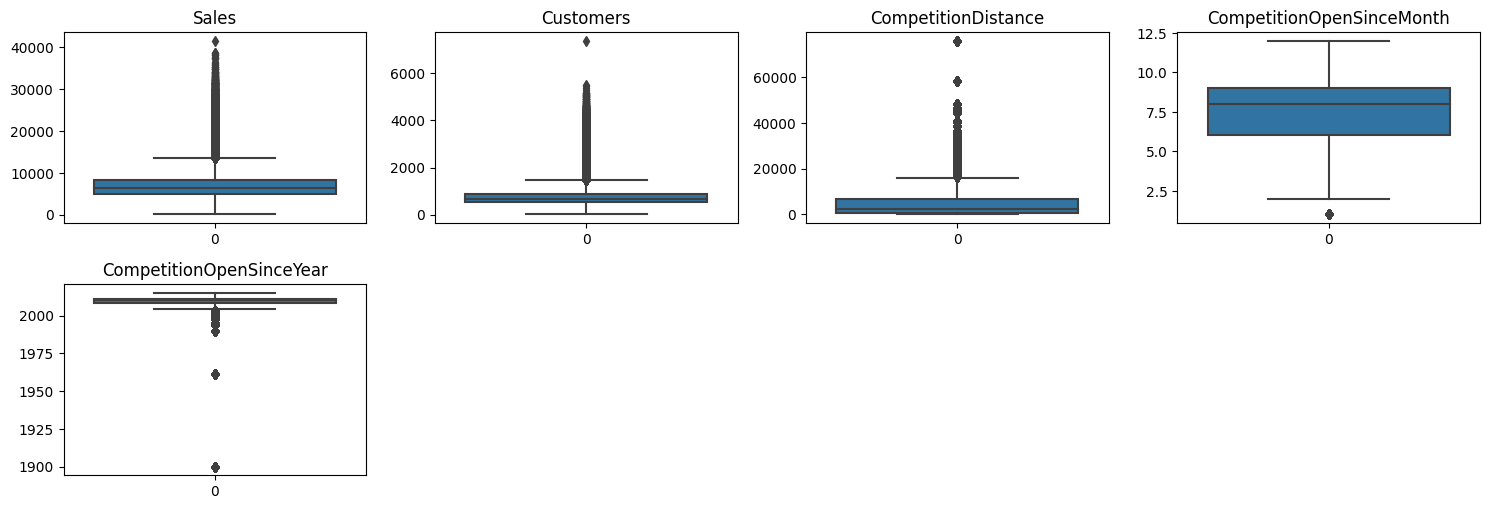

In [ ]:
# checking Outliers with seaborn boxplot
check_outlier=['Sales', 'Customers','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
df_plot=df.copy()
df_plot=df_plot[df_plot['Sales']>0]
n =0
plt.figure(figsize=(15,10))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(4,4,n)
  sns.boxplot(df_plot[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

* We are ignoring the statistical outliers because there might be higher sales & more customers in some stores due to the promotional events & keeping high sales values will be also helpful in better inventory management for the stores during peak time.

* Outliers in Competition Distance can be ignored as there might be few stores located very far away from our stores.

* Outliers in Competition open since year can be ignored as there might be few stores which are opened even before us.

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Using DataFrame.astype() function
df["Date"] = df["Date"].astype('datetime64[ns]')

#Extracting day from date and storing it in new column 'Day'.
df['Day'] = df['Date'].dt.day

#Extracting Month from date and storing it in new column 'Month'.
df['Month'] = df['Date'].dt.month

#Extracting Year from date and storing it in new column 'Year'.
df['Year'] = df['Date'].dt.year

# Covert State holiday from categorical to booleans for simplicity.
df['StateHoliday'] = df['StateHoliday'].replace(['0','a','b','c'],[0,1,1,1])

In [ ]:
# Getting store counts based on store types.
Stores_by_types = dataset_2['StoreType'].value_counts().reset_index().rename(columns = {'index':'StoreType','StoreType':'Num of Stores'})
Stores_by_types

StoreType  Num of Stores
0         a            602
1         d            348
2         c            148
3         b             17

In [ ]:
# Getting store counts based on assortment.
Stores_by_assortment = dataset_2['Assortment'].value_counts().reset_index().rename(columns = {'index':'Assortment','Assortment':'Stores_count'})
Stores_by_assortment

Assortment  Stores_count
0          a           593
1          c           513
2          b             9

In [ ]:
# Finding Relation Betwwwn Store type and Assortment
StoreType_and_Assorment = dataset_2.groupby(['StoreType','Assortment'])['Store'].count().reset_index().rename(columns = {'Store':'Stores_count'})
StoreType_and_Assorment

StoreType Assortment  Stores_count
0         a          a           381
1         a          c           221
2         b          a             7
3         b          b             9
4         b          c             1
5         c          a            77
6         c          c            71
7         d          a           128
8         d          c           220

In [ ]:
# Getting total sales based on store types.
Sales_by_Storetype = df.groupby('StoreType')['Sales'].sum().reset_index().rename(columns = {'Sales':'Total_Sales'})
Sales_by_Storetype

StoreType  Total_Sales
0         a   3165334859
1         b    159231395
2         c    783221426
3         d   1765392943

In [ ]:
# Getting avg sales based on store types.
Avg_Sales_by_Storetype = df.groupby('StoreType')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_Storetype

StoreType     Avg_Sales
0         a   5738.179710
1         b  10058.837334
2         c   5723.629246
3         d   5641.819243

In [ ]:
# Getting avg sales based on Assortment types.
Avg_Sales_by_Assortment = df.groupby('Assortment')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_Assortment

Assortment    Avg_Sales
0          a  5481.026096
1          b  8553.931999
2          c  6058.676567

In [ ]:
# Getting total sales based on Assortment types.
Total_Sales_by_Assortment = df.groupby('Assortment')['Sales'].sum().reset_index().rename(columns = {'Sales':'total_Sales'})
Total_Sales_by_Assortment

Assortment  total_Sales
0          a   2945750070
1          b     70946312
2          c   2856484241

In [ ]:
# Average Sales by Month
Avg_Sales_by_months = df.groupby('Month')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_months

Month    Avg_Sales
0       1  5465.395529
1       2  5645.253150
2       3  5784.578871
3       4  5738.866916
4       5  5489.639973
5       6  5760.964375
6       7  6064.915711
7       8  5693.016554
8       9  5570.246033
9      10  5537.037419
10     11  6008.111821
11     12  6826.611377

In [ ]:
# Store Open percentage on different days.
dw_vs_open = df.groupby('DayOfWeek')['Open'].mean().reset_index()
dw_vs_open['Open']=round(dw_vs_open['Open']*100,2)
dw_vs_open['Closed %']=100-dw_vs_open['Open']
dw_vs_open=dw_vs_open.rename(columns = {'Open':'Open %'})
dw_vs_open

DayOfWeek  Open %  Closed %
0          1   95.05      4.95
1          2   98.83      1.17
2          3   97.44      2.56
3          4   92.32      7.68
4          5   95.06      4.94
5          6   99.54      0.46
6          7    2.48     97.52

In [ ]:
# stores open percentage on school holiday
SchoolH_vs_open = df.groupby('SchoolHoliday')['Open'].mean().reset_index()
SchoolH_vs_open

SchoolHoliday      Open
0              0  0.815015
1              1  0.899494

In [ ]:
# stores opened and sales on state holiday
StateH_vs_open = df.groupby(['StateHoliday','Open']).agg({'Open':'count','Sales':'sum'})
StateH_vs_open

Open       Sales
StateHoliday Open                    
0            0     142677           0
             1     843482  5865164768
1            0      30140           0
             1        910     8015855

In [ ]:
# Checking sales in month of christmas holidays
Sales_in_DEC = df[df['Month']==12].groupby('Day')['Sales'].sum().reset_index().rename(columns = {'Sales':'Total_Sales'})
Sales_in_DEC

Day  Total_Sales
0     1     10497004
1     2     21816262
2     3     19173463
3     4     18757912
4     5     20098605
5     6     14910876
6     7      7427610
7     8      6750140
8     9     13937305
9    10     13368045
10   11     13521554
11   12     14021409
12   13     14791543
13   14      8156915
14   15     12347413
15   16     26244608
16   17     22537379
17   18     21997886
18   19     21258762
19   20     20290907
20   21     10424614
21   22     11271620
22   23     25062180
23   24      9845524
24   25       297971
25   26       393835
26   27     13878860
27   28      6944639
28   29      7517979
29   30     17857878
30   31      8430455

### What all manipulations have you done?


* Variable named 'Stateholiday' is categorical with '0',0, a,b,c which is converted into a boolean datatype for simplicity in EDA & model building.
* Date column was in object type which was converted to DateTime.
* From the Date Column we have extracted the days, months & years by making separate columns for each.

## ***4. Data Vizualization: Relationships between variables***

In [ ]:
#Created a function to plot barplots when column is passed using plotly.
def bar_plot_Sales(a):
  y=df.groupby(a)['Sales'].mean().sort_values().reset_index()
  fig = x.bar(y, x=a,y="Sales",title=a +' wise average sales',color=a, height=500,width=700)
  fig.show()

#### Chart - 1

In [ ]:
# Stores count based on type
fig = x.pie(Stores_by_types, values='Num of Stores', names=['a','d','c','b'],title='Stores count based on type')
fig.update_layout(autosize=True,width=750,height=600)

##### 1. Why did you pick the specific chart?

* The pie chart is visually striking and easy to understand.
The pie chart gives us an idea of the relative proportion for each category of data at a single glance and permits a visual check of the reasonableness or accuracy of calculations.

##### 2. What is/are the insight(s) found from the chart?

* Store type A has maximum number of stores where as B has least.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Very few B type stores are present which can be increased.

#### Chart - 2

In [ ]:
# Number of Stores based on Assortment
fig = px.Figure(data=[px.Pie(labels=['a','c','b'],values= Stores_by_assortment['Stores_count'], hole=.5)])
fig.update_layout(autosize=False,width=700,height=500,title='Stores count based on Assortment',legend_title_text = 'Assortment')
fig.show()

##### 1. Why did you pick the specific chart?

* Donut charts are used to show the proportions of categorical data, with the size of each piece representing the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

* According to the chart assortment type A has maximum number of stores where Type B has minimum.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* B type assortment are very less which can be increased as per the customer demand.

#### Chart - 3

In [ ]:
# Store type vs Assortment

# Reshape the data into a pivot table format for plotting
pivot_df = StoreType_and_Assorment.pivot_table(index='StoreType', columns='Assortment', values='Stores_count', fill_value=0)

# Create the stacked bar plot
fig = px.Figure(data=[
    px.Bar(name='Assortment a', x=pivot_df.index, y=pivot_df['a']),
    px.Bar(name='Assortment b', x=pivot_df.index, y=pivot_df['b']),
    px.Bar(name='Assortment c', x=pivot_df.index, y=pivot_df['c'])
])

# Update the layout of the plot
fig.update_layout(title='StoreType vs Assortment', barmode='stack',xaxis_title='Store Type',yaxis_title='Stores Count',)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

* Stacked Bar charts are used to show how a larger category is divided into smaller subcategories and what the relationship of each part has on the total amount.

##### 2. What is/are the insight(s) found from the chart?

* Only B type store has all three types of Assortment, Remaining stores i.e. A,C,D have a & c assortments.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* B type assortment can be extended to other type of stores as well.

#### Chart - 4

In [ ]:
# Checking outliers in CompetitionDistance.
fig = x.box(df, x='CompetitionDistance')
fig.update_layout(autosize=False,width=1000,height=450,title='Box plot of CompetitionDistance')
fig.show()

#####  Why did you pick the specific chart?

* Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers.

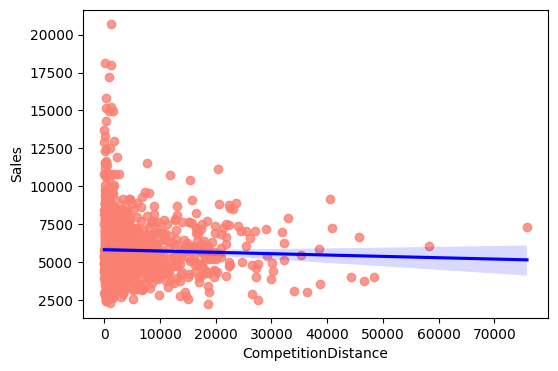

In [ ]:
#Created dataframe of Stores and Competition distance by using groupby on mean value of sales.
df_dist=df.groupby(['Store','CompetitionDistance'])['Sales'].mean().sort_values().reset_index()

# Regression Plot between Sales and Competition Distance
plt.figure(figsize=(6,4))
sns.regplot(x='CompetitionDistance',scatter_kws={"color": "salmon"}, line_kws={"color": "blue"},
                    y='Sales',
                    data=df_dist)
plt.show()

##### 1. Why did you pick the specific chart?

* Scatter plot with a regression line is a useful tool for visualizing and analyzing the relationship between two variables, assessing the goodness of fit of the regression model, and identifying any outliers or influential points in the data.

##### 2. What is/are the insight(s) found from the chart?

* The median of competition Distance is 2330m, Which clearly indicates the competition stores are not far away. Which may affect sales.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Stores, where the competition distance is more than 10000m, show that there is a monopoly of the store in that area. Also, there is not much demand in those areas which can be observed from the low average sales which might be the reason for the competition refraining from opening stores in these areas.

* Stores, where the competition distance is closer, can offer better prices of products that are available at competition stores.

#### Chart - 5

In [ ]:
#barplot for  sales across the DayofWeek.
bar_plot_Sales('DayOfWeek')

In [ ]:
# barplot for sales across the Year.
bar_plot_Sales("Year")

##### 1. Why did you pick the specific chart?

* Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

* The 7th day of week shows that sales is least which is due to closer of stores.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Some stores can plan to open on Sunday, because there will be very less competition and they'll be able to make more profit from the sales.

#### Chart - 6

In [ ]:
# barplot for Monthly Average Sales
bar_plot_Sales('Month')

##### 1. What is/are the insight(s) found from the chart?

* Monthly average sales are more in December which might be due to festive season.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* In first 2 quarters, we saw a dip in sales, we can run promotion & deploy better marketing strategies to create awareness customers.

#### Chart - 7

In [ ]:
#barplot for Average sales by Store Type.
bar_plot_Sales('StoreType')

#Barplot for total sales by storetype
fig = x.bar(Sales_by_Storetype, x='StoreType',y='Total_Sales',title='Total Sales by Store Type',color='StoreType', height=500,width=900)
fig.show()

##### 1. What is/are the insight(s) found from the chart?

* Least number of stores comes under B store type where as average sales value maximum in it.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Average sales are maximum in B type Store but very few stores are present, So increasing B type stores will boost revenue.

#### Chart - 8

In [ ]:
# barplot for Average sales by Assortment.
bar_plot_Sales('Assortment')

#barplot for total sales by Assortment
fig = x.bar(Total_Sales_by_Assortment, x='Assortment',y='total_Sales',title='Total Sales by Assortment',color='Assortment', height=500,width=900)
fig.show()

##### 1. What is/are the insight(s) found from the chart?

* Total sales are minimum in assortment type B but average sales are maximum.
* Total sales are highest in assortment type A but average sales are lowest.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Assortment type B can be extended to more stores as the average sales are higher.

#### Chart - 9

In [ ]:
# barplot for average Sales for school holiday
bar_plot_Sales('SchoolHoliday')

# barplot for average Sales for school holiday
bar_plot_Sales('StateHoliday')

##### 1. What is/are the insight(s) found from the chart?

* The average sales are higher on School holidays as parents must be free to visit the stores.
* Average sales on state holidays are almost negligible as compared to non holiday days as most of the stores might be closed.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* On Holidays people are more likely to visit stores, So offering promotions on those days might help in increasing revenue.

#### Chart - 10

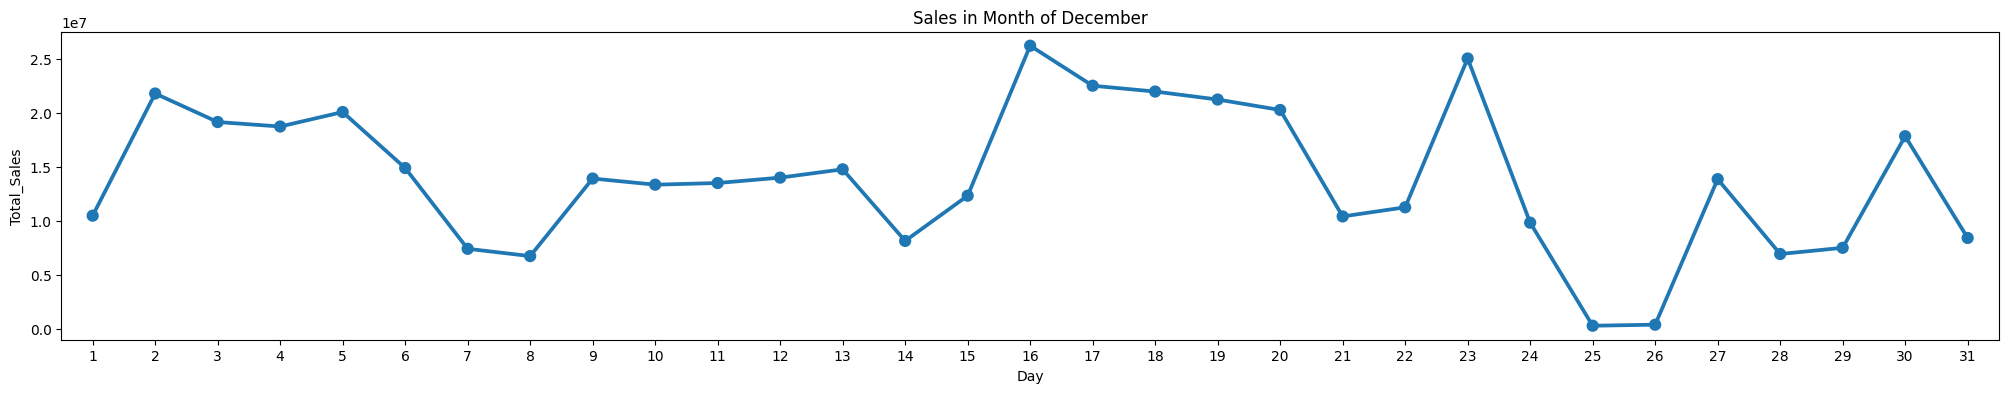

In [ ]:
# Pointplot for total Sales in Month of December
plt.figure(figsize=(25,4))
sns.pointplot(x= 'Day', y= 'Total_Sales', data=Sales_in_DEC)
plt.title('Sales in Month of December')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Weekly sales and customers peak at the mid-December. It may be guessed that people buy medicines in advance just before the shops close for the holiday season.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Some stores can be planned to open for emergence puposes as we serve in medical field.

#### Chart - 11

In [ ]:
# Average sales on Promo days
bar_plot_Sales('Promo')

# Average sales on Prom2 days
bar_plot_Sales('Promo2')

##### 1. What is/are the insight(s) found from the chart?

* There is significant increase in Sales during promo 1(promo) but trend got reversed during promo 2.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Promo 2 is a disaster and should be discontinued with immediate effect instead Promo 1 can be extended further.

#### Chart - 12

In [ ]:
#Percentage of stores open and closedduring different days
fig = px.Figure(data=[
    px.Bar(name = 'Open %', x=[1,2,3,4,5,6,7],y=dw_vs_open['Open %']),
    px.Bar(name = 'Close %', x=[1,2,3,4,5,6,7],y=dw_vs_open['Closed %'])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Stores opening percentage on days of week')
fig.show()

##### 1. Why did you pick the specific chart?

* Grouped Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Maximum number of stores are remains closed on 7th day of the week and maximum stores stay opened on day before.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Some stores can be opened on sunday as well as there will be lesser competition on that day.

#### Chart - 13

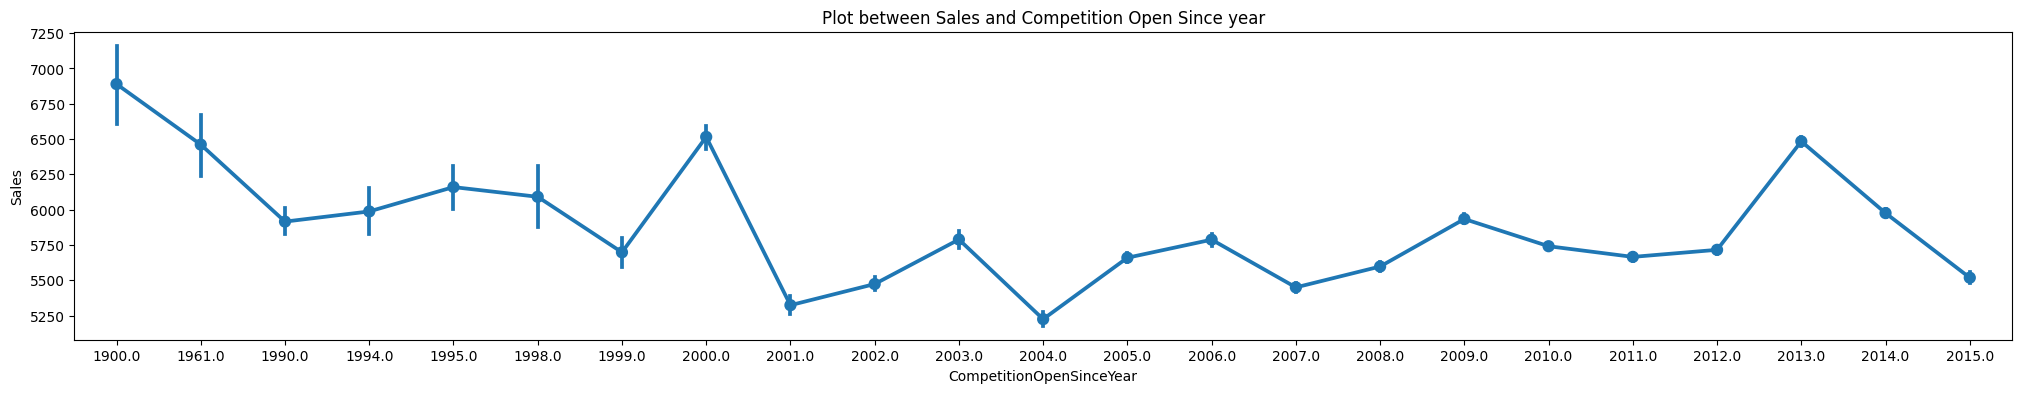

In [ ]:
# Plot between Sales and Competition Open Since year
plt.figure(figsize=(25,4))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')
plt.show()

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

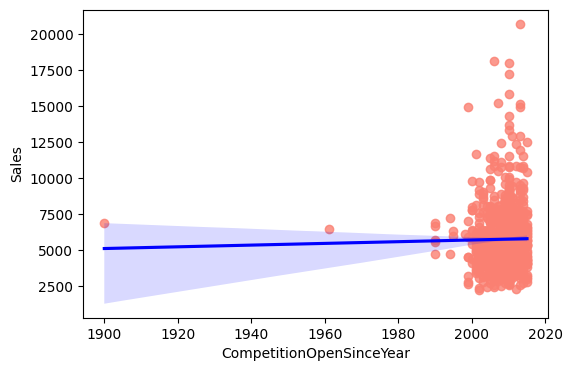

In [ ]:
#Created dataframe using groupby of store and competition open since year with mean sales
df_comp=df.groupby(['Store','CompetitionOpenSinceYear'])['Sales'].mean().sort_values().reset_index()

# Plot between Sales and Competition Open Since year
plt.figure(figsize=(6,4))
sns.regplot(x='CompetitionOpenSinceYear',scatter_kws={"color": "salmon"}, line_kws={"color": "blue"},
                    y='Sales',
                    data=df_comp)

##### 1. Why did you pick the specific chart?

* Show point estimates and errors using dot marks. A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Competition in stores keeps on increasing every year down the line, especially after the year 2000 and older stores have relatively more impact on average sales of the store than relatively newer ones.

* With competition increasing every year, downward trend in Sales can be observed.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Where competition stores are nearby, better pricing statergy can be applied to retain the customers.

#### Chart - 14

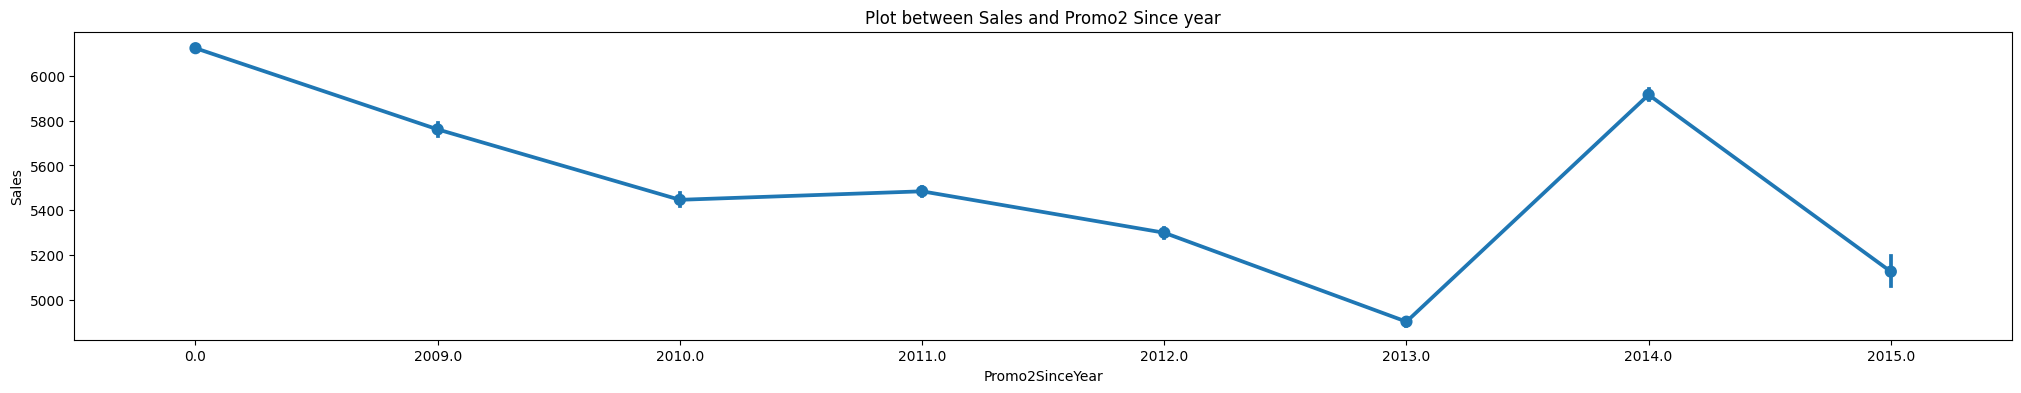

In [ ]:
# Plot between Sales and Promo2 Since year
plt.figure(figsize=(25,4))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Promo2 Since year')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* With implementation promo2 downward trend of sales can be observed which clearly indicates promo2 is not working.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Promo 2 should be discontinued with immediate effect.

#### Chart - 15 - Correlation Heatmap

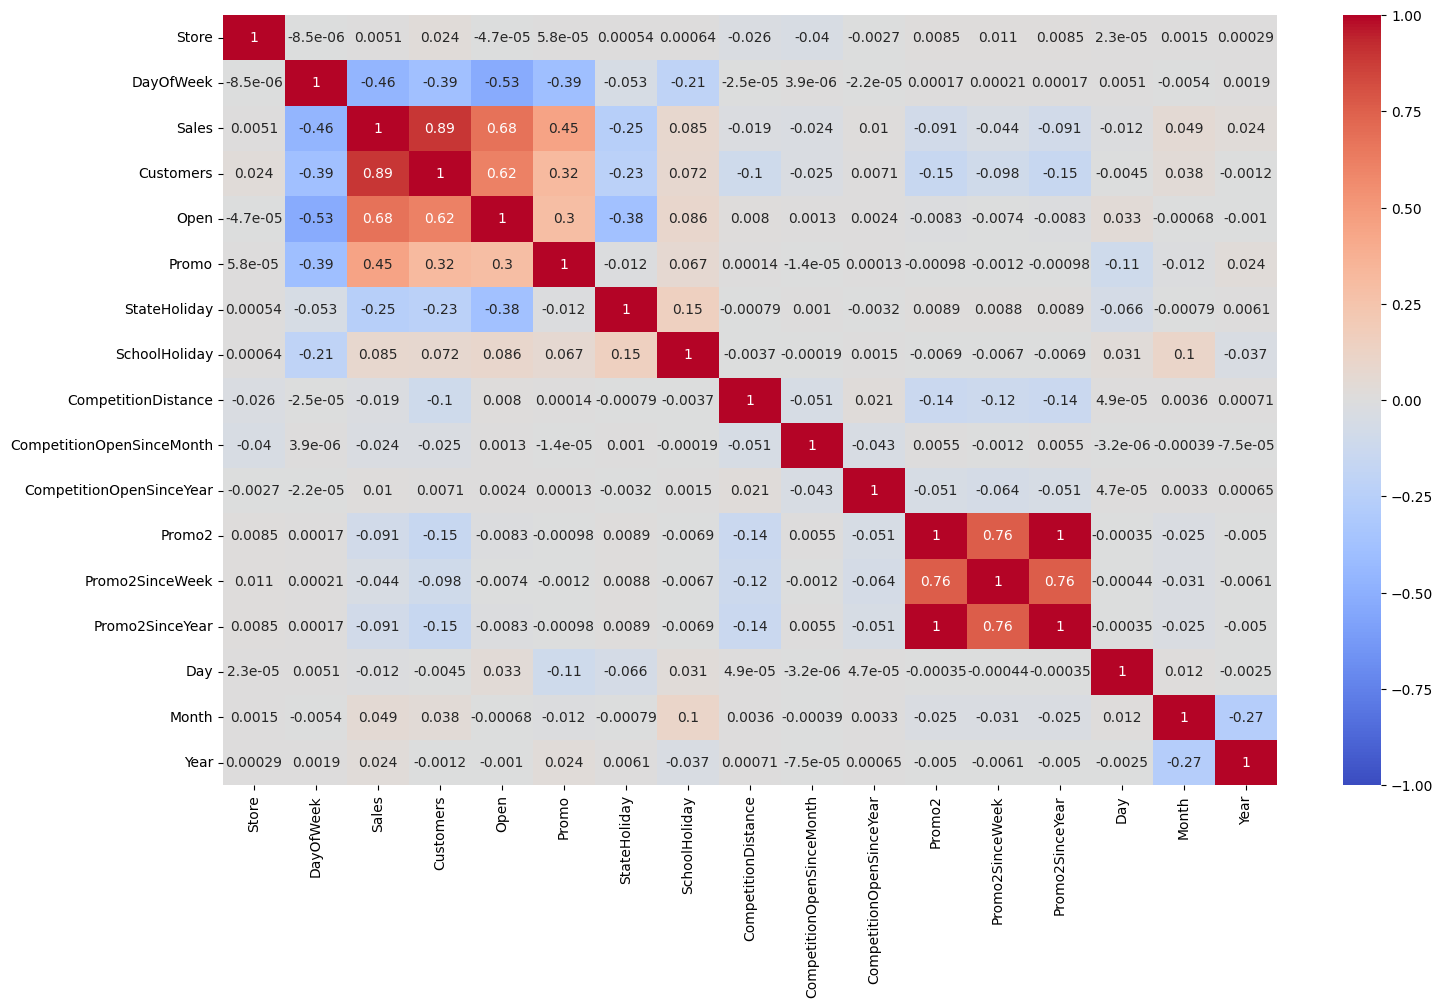

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
corr_df = df.corr()
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

* Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

* Sales shows positive correlation with Customer, open & promo.
* Customer has positive correlation with open.
* Promo2, Promo2SinceWeek & Promo2SinceYear are highly correlated with each other.


#### Chart - 16 - Pair Plot

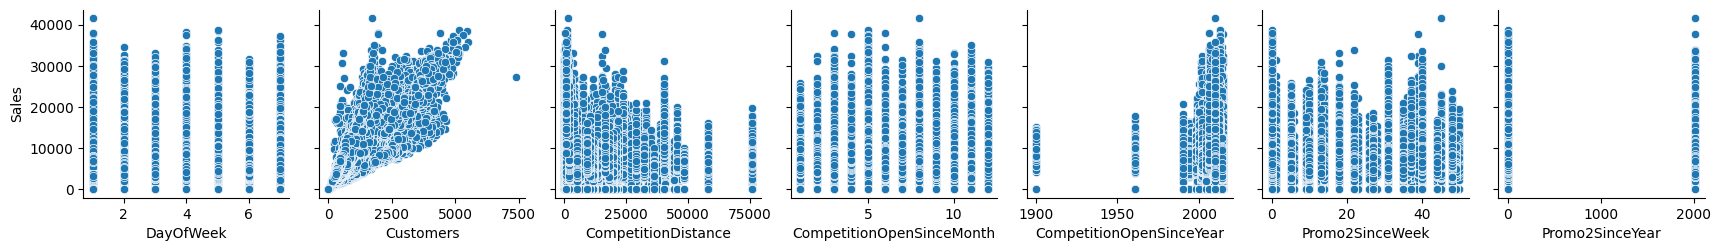

In [ ]:
# Pair Plot visualization code
numeric_col = ['DayOfWeek', 'Customers','CompetitionDistance','CompetitionOpenSinceMonth',
              'CompetitionOpenSinceYear', 'Promo2SinceWeek','Promo2SinceYear']
g = sns.pairplot(df,x_vars = numeric_col,y_vars = 'Sales')
plt.show()

##### 1. Why did you pick the specific chart?

* A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python!

#### Insights from EDA

* Out of 1115 Stores given, 602 stores come under store type A, 348 stores come under type D, 148 stores in type C, and 17 stores in type B.
* Out of 1115 Stores given, 593 stores come under Assortment type A, 513 stores in Assortment type C, and 9 Assortment stores in type B.
* In the sales variable 172817 rows are with 0 sales.
* The median of competition Distance is 2330, Which clearly indicates the competition stores are not far away and the Highest value for competition distance is 75860.
* Maximum no. of sales are recorded on 1st day of week and minimum on 7th day of the week due to closer of maximum no. of stores.
* Assortment B is available only at store type B.
* The Average number of sales is maximum in B whereas total sales are maximum in A which indicates store type B may have high-value customers and the same goes with assortment types.
* We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays was more than that were opened during State Holidays.
* Promo 1 is, a relatively more successful event as the sales increased but promo 2 was a bit unsuccessful as sales decreased after the implementation.
* With competition increasing every year the sales saw a downward trend.
* Sales are positively correlated with the Number of Customers, Opening of stores & promo.
* Weekly sales and customers peak in mid-December just before the Christmas Holidays.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### **Hypothetical Statement - 1**

To check if mean competition distance affects average sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales with respect to average CompetitionDistance.

H1(alternate hypothesis):There is significant difference in average sales with respect to average CompetitionDistance(2330m).

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['CompetitionDistance']<2330]['Sales'],popmean=df['Sales'].mean(),alternative="two-sided")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


Thus there is significant difference in average sales with respect to average CompetitionDistance(2330m)

##### Why did you choose the specific statistical test?

The one-sample t-test is a statistical procedure used to determine whether the mean value of a sample is statistically the same or different from the mean value of its parent population from which the sample was drawn.

### **Hypothetical Statement - 2**

To recheck if Promo was more successful than Promo2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales during Promo and Promo2 days.

H1(alternate hypothesis):Average sales is less during Promo2 days than Promo days.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['Promo2']==1]['Sales'],popmean=df[df['Promo']==1]['Sales'].mean(),alternative="less")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


Thus average sales in less during promo2 days than Promo days.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 3**

To recheck if there is a increase in sales during promo2 days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales during Promo2 and non Promo2 days.

H1(alternate hypothesis):Average sales is less during Promo2 days than non Promo2 days.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['Promo2']==1]['Sales'],popmean=df['Sales'].mean(),alternative="less")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


Thus average sales is less during Promo2 than non Promo2 days

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 4**

To recheck if there is a increase in sales during SchoolHoliday days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales during SchoolHoliday and non SchoolHoliday days.

H1(alternate hypothesis):Average sales is more during SchoolHoliday days than non SchoolHoliday days.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['SchoolHoliday']==1]['Sales'],popmean=df['Sales'].mean(),alternative="greater")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


Thus average sales is greater during SchoolHoliday than non SchoolHoliday days.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 5**

To recheck if average sales is more in store type b.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales of Store type b and other stores.

H1(alternate hypothesis):Average sales is more in b type store than other stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['StoreType']=='b']['Sales'],popmean=df['Sales'].mean(),alternative="greater")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


Thus average sales is greater in b store type than other stores.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 6**

To recheck if average sales is more during december.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales of Store during the month of December and other month.

H1(alternate hypothesis):Average sales is more during the month of December than other month.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['Month']==12]['Sales'],popmean=df['Sales'].mean(),alternative="greater")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


Thus average sales more during the month of December than other months.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 7**

To check if there is a correlation between Competition Distance and Sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant correlation between Competition Distance and sales .


H1(alternate hypothesis): There is significant correlation between Competition Distance and sales.


#### 2. Perform an appropriate statistical test.


In [ ]:
# Performing Pearson's Correlation test
stat, p = pearsonr(df['Sales'], df['CompetitionDistance'])

#95% Confidence interval
if p > 0.05:
 print("Fail to Reject NUll Hypothesis")
else:
 print("Reject NUll Hypothesis")

Reject NUll Hypothesis


Thus there is significant correlation between Competition Distance and sales.

##### Which statistical test have you done to obtain P-Value?

Pearson's Correlation test

##### Why did you choose the specific statistical test?

Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

# **Conclusion**

# <b>Conclusions from EDA


* The most selling and crowded store type is A.
* Sales is highly correlated to number of Customers.
* More stores are opened during School holidays than State holidays.
* Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.
* Mondays have most sales since most of the Sundays are closed.
* Promo 1 is a successful event as the sales have increased but promo 2 was unsuccessful as sales decreased after the implemention.
* Store type b has higher sales and customers per store than other store types. More Store type b must be opened.
* Assortment b is available only at store type b and it has more sales and customers than any other assortment. More assortment b must be stocked to meet the demands of customers.
* Weekly sales and customers peak at the mid-December. It may be guessed that people buy medicines in advance just before the shops close for the holiday season.
